In [1]:
from base import np
from threeD import Solver3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients3D/"

## Results for Shell Bacterial Concentration

$$∇_r^2 n​ − \alpha \cdot c(r) \cdot n(r) = 0$$

These Bacterial Profiles need to be normalised, since theoretically, $r \in [R_D, \infty)$.

$$\int_{R_D}^{\infty} c(r) 4 \pi r^2 \; dr = 1$$

$c_{\text{shell}}(r; \rho,\lambda) = 
\begin{cases}
    c_0(\rho, \lambda) & r \in [\rho,\rho +\lambda], \\
    0 & r \in [R_D, \rho] \cup [\rho +\lambda, \infty).
\end{cases}
\implies
\int_{\rho}^{\rho +\lambda} r^2 \, dr =  \frac{(\rho +\lambda)^3 - \rho^3}{3} = \frac{1}{4 \pi c_0(\rho, \lambda)}
$

$$
c_{\text{shell}}(r; \rho,\lambda) = 
\begin{cases}
    c_0(\rho, \lambda) = \frac{3}{4 \pi} \frac{1}{\lambda^3 + 3\lambda^2 \rho + 3\lambda \rho^2}, & r \in [\rho, \rho +\lambda] \\
    0 & r \in [R_D, \rho] \cup [\rho + \lambda, \infty)
\end{cases}
$$

In [2]:
def shell_generator(rho, lambda_):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on rho and lambda_'
        cond = (r >= rho) & (r <= rho + lambda_)
        c = 3/(4*np.pi) * 1/(lambda_**3 + 3 * lambda_**2 * rho + 3 * lambda_ * rho**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

In [3]:
syst_params = {
    'R_dtm' : 1, 'R_inf' : 1000,
    'L' : 50,       # Length of plot domain
    'T_ratio': 1e0,     # WTF ¿?¿?¿?
    'nr': 10_000,    # 100_000
    # Shell parameters
    'rho': 10 ,     # Starting point of the step
    'lambda' : 20,  # Length of the step
}

R_dtm, R_inf, L = syst_params['R_dtm'], syst_params['R_inf'], syst_params['L']

___
### Spherical Shell Concentration with Analytical Solution 📄

After solving the ODE and applying the boundary condition: $n(r=R_D) = 0$ \& $n(r=\infty) = 1$. We get:

$$
n(r) = 
\begin{cases}
A\left(\frac{1}{r} - \frac{1}{R_D} \right) & R_D \leq r < \rho, \\
\frac{1}{r} \left( B e^{kr} + C e^{-kr} \right) & \rho \leq r \leq \rho + \lambda, \\
\frac{D}{r} + 1 & r > \rho + \lambda,
\end{cases}
$$

$k = k(\rho, \lambda) := \sqrt{\alpha \, c_0(\rho, \lambda)}$

Where $A$, $F$, $G$, $D$ are constants to be determined by continuity of $n(r)$ and $\frac{d \, n}{dr}$ at $r = \rho$ and $r = \rho + \lambda$.

1256.6370614359173

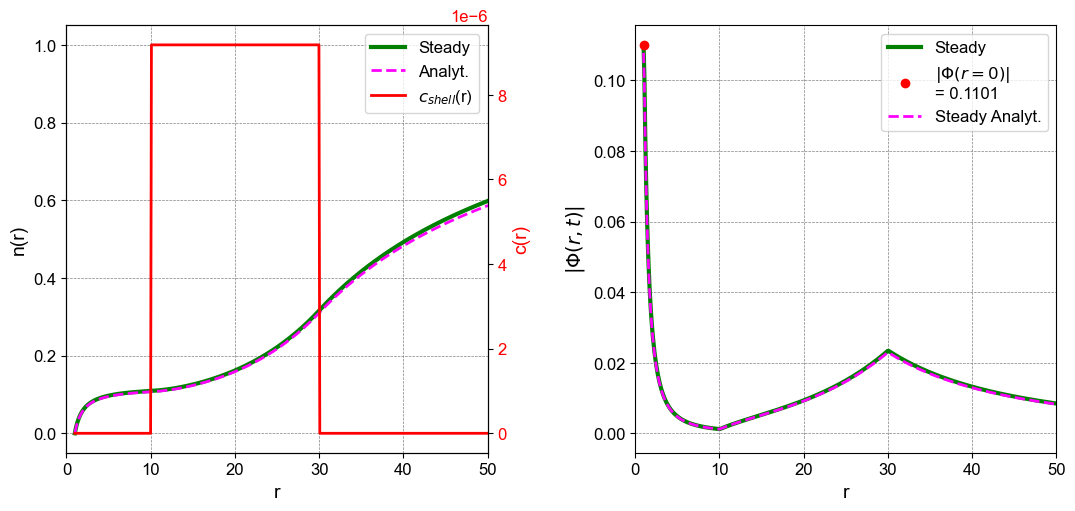

In [4]:
c_shell = shell_generator(syst_params['rho'], syst_params['lambda'])
S3D = Solver3D(syst_params, c_shell)

S3D.ode.solve()
S3D.ode.analyt.solve()
S3D.plot.double_plot(xlim=(0, L))
S3D.plot.save(figures_path, "c_shell(r)_analyt")
S3D.alpha

In [5]:
print(f'c_0 = {S3D.c.max():.4e}')

n_num = S3D.ode.n[1:]
n_analyt = S3D.ode.analyt.n[1:] # we remove the first point to avoid division by zero
r = S3D.r[1:]

relative_error = np.abs(n_num - n_analyt) / np.abs(n_analyt)
print(f'Mean Relative Error: {relative_error.mean()*100:.4f} %')

weights = 1/r**2 / sum(1/r**2)
relative_error_weighted = np.abs(n_num - n_analyt) / np.abs(n_analyt) * weights

print(f'Mean Relative Error Weighted: {relative_error_weighted.mean()*100:.4f} %')

c_0 = 9.1820e-06
Mean Relative Error: 2.1002 %
Mean Relative Error Weighted: 0.0002 %


___
### 1. Exponential Decay Concentration ❌📄

$$
c_{\text{exp}}(r; \lambda) = \frac{1}{4 \pi \lambda \, r^{2}} \mathrm{e}
^{- \frac{r - R_D}{\lambda}}, \quad \lambda>0
$$

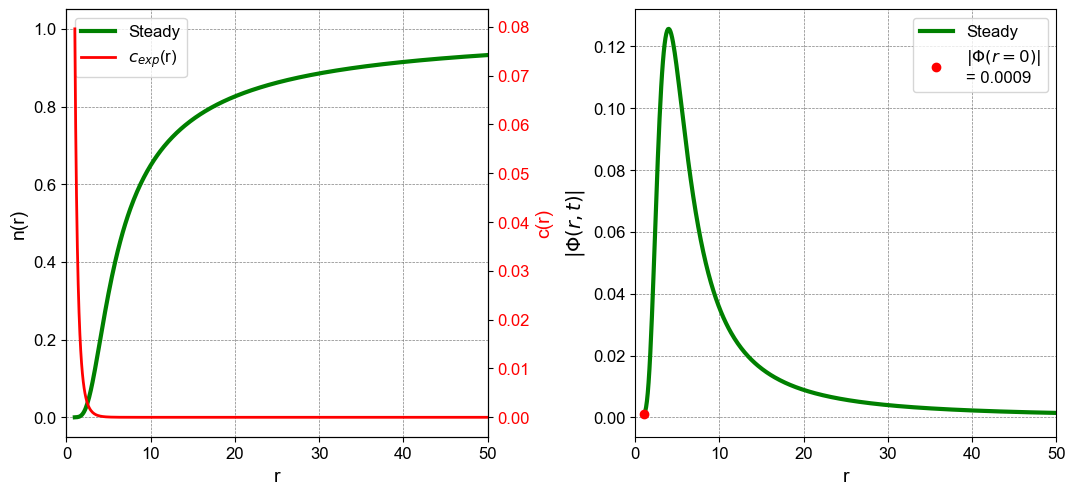

In [6]:
def c_exp(r):
    λ = 1 # > 0
    A = 1 / (4 * np.pi * λ * r**2)
    return A * np.exp( (R_dtm - r)/λ )

S3D = Solver3D(syst_params, c_exp)

S3D.ode.solve()
S3D.plot.double_plot(xlim=(0, L))

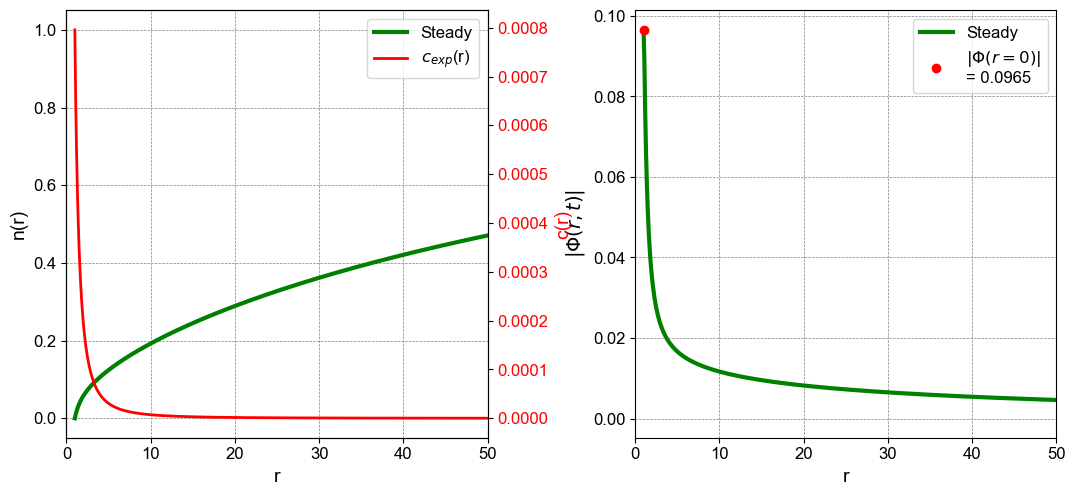

In [7]:
def c_exp(r):
    λ = 100 # > 0
    A = 1 / (4 * np.pi * λ * r**2)
    return A * np.exp( (R_dtm - r)/λ )

S3D = Solver3D(syst_params, c_exp)

S3D.ode.solve()
S3D.plot.double_plot(xlim=(0, L))